In [1]:

import pandas as pd

df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Check if there are any missing values
df.isnull().values.any()

# count missing values in each column
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [2]:
# Check for duplicate rows
duplicates = df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
9707    False
9708    False
9709    False
9710    False
9711    False
Length: 9712, dtype: bool

In [3]:
df['Health_Impacts'].isnull().value_counts()

Health_Impacts
False    6494
True     3218
Name: count, dtype: int64

In [4]:
#replacing none values with "no health issues"
df['Health_Impacts'] = df['Health_Impacts'].fillna("No health issues")
print(df['Health_Impacts'].value_counts())

Health_Impacts
No health issues                                 3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64


In [5]:
import pandas as pd

# Define bins and labels
bins = [7, 12, 15, 18]
labels = ["Pre-Teens (7-12)", "Teenagers (13-15)", "Late Teens (16-18)"]

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df[['Age', 'Age_Group']])

      Age           Age_Group
0      14   Teenagers (13-15)
1      11    Pre-Teens (7-12)
2      18  Late Teens (16-18)
3      15   Teenagers (13-15)
4      12    Pre-Teens (7-12)
...   ...                 ...
9707   17  Late Teens (16-18)
9708   17  Late Teens (16-18)
9709   16  Late Teens (16-18)
9710   17  Late Teens (16-18)
9711   15   Teenagers (13-15)

[9712 rows x 2 columns]


In [6]:
df['Health_Impacts'].isnull().sum()
df.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
Age_Group                            0
dtype: int64

In [7]:
print(df.columns.tolist())

['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device', 'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio', 'Health_Impacts', 'Urban_or_Rural', 'Age_Group']


In [8]:
df['Health_Impacts'] = df['Health_Impacts'].astype(str).str.strip().str.lower()

# Mapping dictionary
health_map = {
    "eye strain": "Physical",
    "headache": "Physical",
    "obesity": "Physical",
    "neck pain": "Physical",
    "back pain": "Physical",
    "poor posture": "Physical",
    "fatigue": "Physical",


    "anxiety": "Mental",
    "depression": "Mental",
    "stress": "Mental",
    "poor sleep": "Mental",
    "reduced attention span": "Mental",
     "addiction": "Mental",
    "no health issues": "None",
    "none": "None",
    "no issue": "None",
    "no issues": "None"
}

# Apply mapping
df['Health_Category'] = df['Health_Impacts'].map(health_map)

In [9]:
#3. Create summary table (cross-tabulation) ---
summary = pd.crosstab(df['Age_Group'], df['Health_Category'])
summary

Health_Category,Mental,None,Physical
Age_Group,,,
Pre-Teens (7-12),1103,1795,257
Teenagers (13-15),776,723,187
Late Teens (16-18),774,700,200


In [10]:
df['Health_Impacts'].isnull().sum()
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                          0
Urban_or_Rural                          0
Age_Group                               0
Health_Category                      3197
dtype: int64

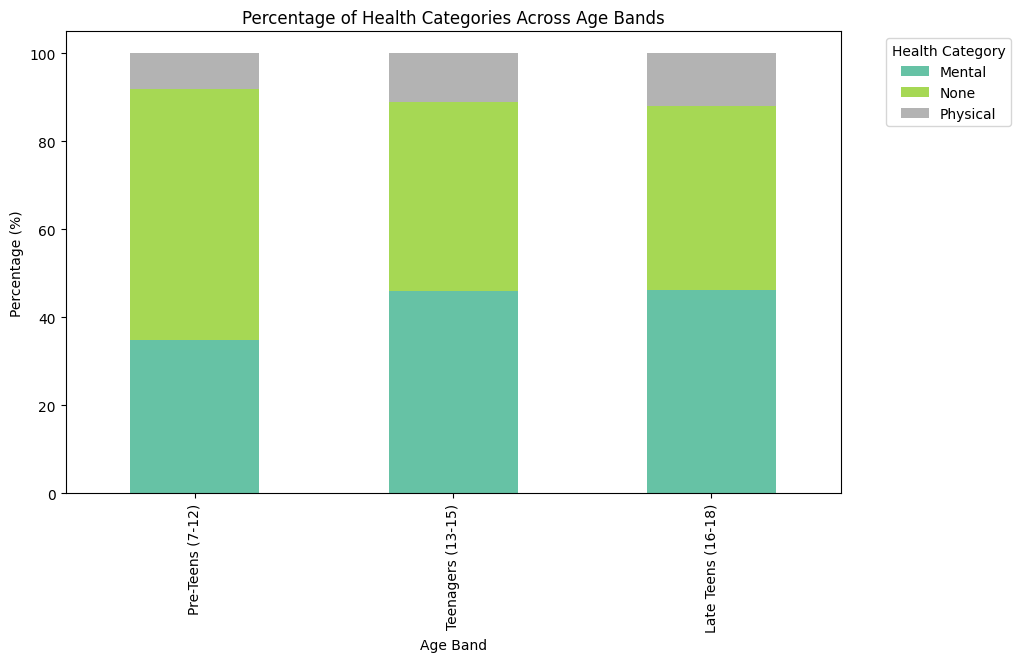

In [11]:
import matplotlib.pyplot as plt

# Calculate percentages
pivot_percent = summary.div(summary.sum(axis=1), axis=0) * 100

pivot_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Percentage of Health Categories Across Age Bands")
plt.ylabel("Percentage (%)")
plt.xlabel("Age Band")
plt.legend(title='Health Category', bbox_to_anchor=(1.05, 1))
plt.show()

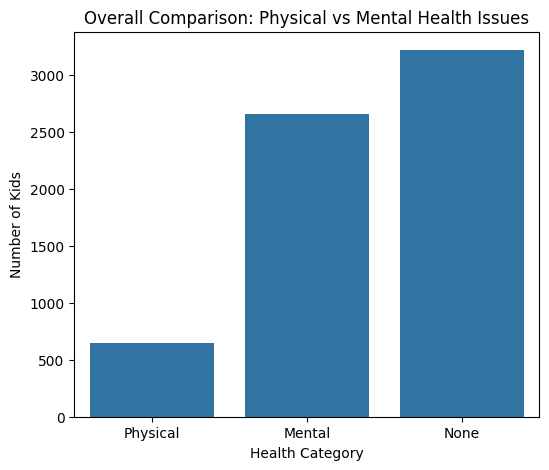

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Health_Category', order=['Physical','Mental','None'])
plt.title("Overall Comparison: Physical vs Mental Health Issues")
plt.xlabel("Health Category")
plt.ylabel("Number of Kids")
plt.show()

In [13]:
import pandas as pd

# --- 1. Categorize Primary Device based on Screen Size ---
# Example device-to-size mapping (in inches)
device_screen_size = {
    "Smartphone": 7,
    "Tablet": 12,
    "Laptop": 22,
    "TV": 40
}
# Map screen sizes
df['Device_Size'] = df['Primary_Device'].map(device_screen_size)
# Categorize devices: Small (<30") vs Large (>30")
df['Device_Category'] = df['Device_Size'].apply(lambda x: "Small Screen (<30\")" if x < 30 else "Large Screen (>30\")")

# --- 2. Categorize Screen Time ---
# Example thresholds (adjust as needed):
# Low: <2 hrs, Medium: 2–5 hrs, High: >5 hrs
def categorize_screen_time(hours):
    if hours < 2:
        return "Low Screen Time"
    elif 2 <= hours <= 5:
        return "Medium Screen Time"
    else:
        return "High Screen Time"

df['Screen_Time_Category'] = df['Avg_Daily_Screen_Time_hr'].apply(categorize_screen_time)

# --- 3. Check results ---
df[['Primary_Device', 'Device_Size', 'Device_Category', 'Avg_Daily_Screen_Time_hr', 'Screen_Time_Category']].head()


,Primary_Device,Device_Size,Device_Category,Avg_Daily_Screen_Time_hr,Screen_Time_Category
0,Smartphone,7,"Small Screen (<30"")",3.99,Medium Screen Time
1,Laptop,22,"Small Screen (<30"")",4.61,Medium Screen Time
2,TV,40,"Large Screen (>30"")",3.73,Medium Screen Time
3,Laptop,22,"Small Screen (<30"")",1.21,Low Screen Time
4,Smartphone,7,"Small Screen (<30"")",5.89,High Screen Time


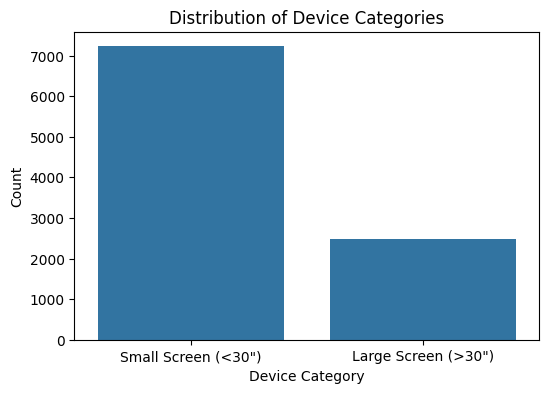

In [14]:
# 1. Device Category Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Device_Category")
plt.title("Distribution of Device Categories")
plt.xlabel("Device Category")
plt.ylabel("Count")
plt.show()

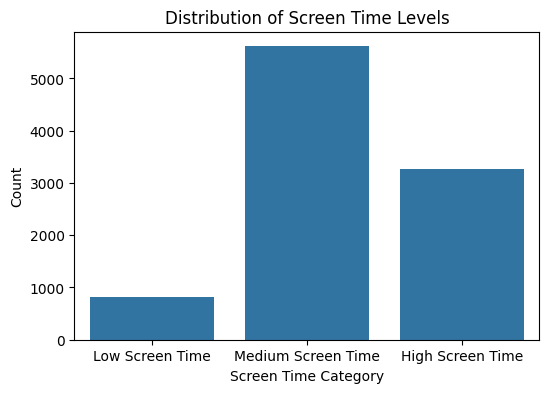

In [15]:
# 2. Screen Time Category Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Screen_Time_Category", order=["Low Screen Time", "Medium Screen Time", "High Screen Time"])
plt.title("Distribution of Screen Time Levels")
plt.xlabel("Screen Time Category")
plt.ylabel("Count")
plt.show()

In [ ]:
#A new Age_Group column is created by categorizing ages into bins:
#--Pre-Teens (7–12)
#--Teenagers (13–15)
#--Late Teens (16–18)

#The Health_Impacts column is cleaned (converted to lowercase, stripped of spaces).
#A mapping dictionary is used to classify health issues into categories:
#--Physical (e.g., eye strain, headache, obesity, posture issues)
#--Mental (e.g., anxiety, stress, poor sleep, addiction)
#--None (no health-related issues)

#A new column Health_Category is created based on this mapping.
#A cross-tabulation summary (pd.crosstab) is generated to show the distribution of health categories across age groups.
#A stacked bar chart is plotted to visualize the percentage of health issues by age group.